In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
from sklearn.linear_model import LinearRegression

X = df[['TV']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [4]:
model.coef_

array([0.05546477])

In [42]:
model.intercept_

6.974821488229891

In [6]:
from sklearn.linear_model import LinearRegression

X = df[['TV']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

print('slope is ' + str(model.coef_))
print('Intercept is ' + str(model.intercept_))

slope is [0.05546477]
Intercept is 6.974821488229891


In [7]:
y_pred=model.predict(X)

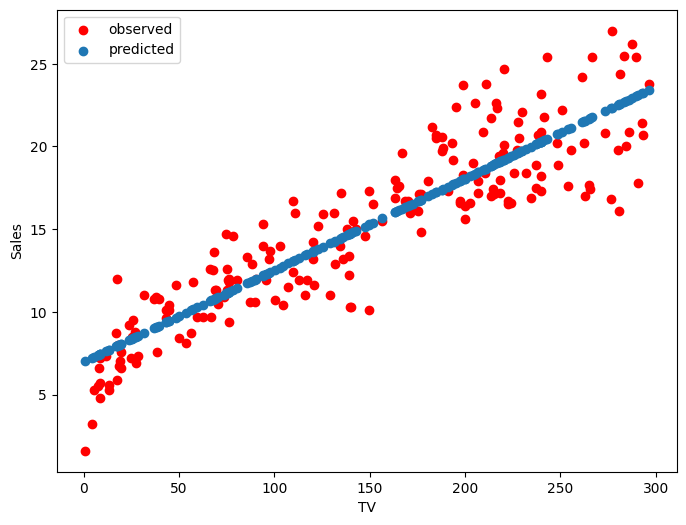

In [8]:
plt.figure(figsize=(8,6))
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(X, y, color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(X, y_pred, label='predicted')


plt.legend();

-----

# Some theory

> The regression sole purpose in life is to <b>find a curve that best fits the data points</b>. 

-----

There are two main **applications** for finding best lines between variables:

<u><b> Describe: </b></u>
- Use <b> regression </b> to determine the strength of the relationship between the variable you are interested in and the other variables. 

<u><b> Predict: </b></u>
- Use <b> regression </b> to predict values of new data points. 

------

<u><b> Degrees of freedom </b></u>

A regression line is one of the simplest models. We say it has <b>few degrees of freedom</b>. Namely, a linear regression has <b> two degrees of freedom - the slope and the intercept. </b>

<u><b> Slope:</b></u> The angular coefficient of the linear regression. The greater this number is, the more impact of that specific variable on the Y variable.

<u><b> Intercept:</b></u> The value of Y for which X equals 0.

$$y = b + a x$$

$b \rightarrow$ intercept

$a \rightarrow$ slope

![title](https://raw.githubusercontent.com/Rairocha/images/main/lin_reg.png)

In [13]:
3*36

108

# Measuring your error.

## Error terms: 

<u>1. Residuals</u>

$Y_{observed} - Y_{predicted}$

<u>2. Sum of Residuals</u>

$\sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})$

- This might cancel the errors.

<u>3. Sum of square of residuals</u>

$\sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})^2$

- Heavily penalize higher error value.
- Not robust to outliers.


Linear regression looks for optimizing the intercept and coefficients such that it minimizes the objective function. The objective function is a simple measure of error: 


## <u> Objective Function (Cost Function)</u> 

Minimize the objective function:
- Objective function for **Mean** Squared Error (MSE): $\frac{1}{n} \sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})^2$



Since it tries to make the **mean** error as small as possible, how do you think outliers affect the linear regression?

<b> Outlier greatly affect the regression </b>

In practice:

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[['TV']]
y = df['Sales']

model.fit(X, y)

LinearRegression()

In [17]:
y_observed = df['Sales']
y_predicted = model.predict(X)

In [13]:
list(zip(y_observed, y_predicted))

[(22.1, 19.737265173275386),
 (10.4, 9.443003774125263),
 (12.0, 7.928815540306305),
 (16.5, 15.37773421436806),
 (17.9, 17.002851989126135),
 (7.2, 7.457364991315054),
 (11.8, 10.164045790229526),
 (13.2, 13.641686898670867),
 (4.8, 7.451818514268099),
 (15.6, 18.056682628047753),
 (12.6, 10.641042816267733),
 (17.4, 18.88310770804418),
 (9.2, 8.294883025405394),
 (13.7, 12.382636609011882),
 (19.0, 18.295181141066855),
 (22.4, 17.812637637981695),
 (12.5, 10.735332926065983),
 (24.4, 22.582607898363754),
 (11.3, 10.812983604723366),
 (14.6, 15.144782178395912),
 (18.0, 19.088327358781548),
 (17.5, 20.142157997703166),
 (5.6, 7.70695645842807),
 (20.5, 19.637428586430183),
 (9.7, 10.43027668848341),
 (17.0, 21.556509644676915),
 (15.0, 14.900737188329854),
 (20.9, 20.291912877970972),
 (18.9, 20.77445638105614),
 (10.5, 10.890634283380749),
 (21.4, 23.22045275876368),
 (11.9, 13.236794074243088),
 (13.2, 12.365997177871014),
 (17.4, 21.70626452494473),
 (11.9, 12.282800022166676),
 (1

In [15]:
residual_squared = []

for y_o, y_p in list(zip(y_observed, y_predicted)):
    residual = y_o - y_p
    residual_squared.append(residual ** 2)

In [12]:
np.max(residual_squared)
print(f'Max error {np.max(residual_squared)}, min error {np.min(residual_squared)}, mean error {np.mean(residual_squared)}')

Max error 41.52233366812448, min error 1.5890675338121314e-05, mean error 5.2177438977951285


In [14]:
from sklearn.metrics import mean_squared_error

In [18]:
mean_squared_error(y_observed, y_predicted)

np.float64(5.2177438977951285)

## Root Mean Squared Error (RMSE)

### interpreting the mean squared error

5.2 sales² $\rightarrow$ out of our variable scale

2.28 sales

The average mean error I will have in my prediction in sales is 2.28 if I use only the TV as my predictive variable.

In [22]:
np.sqrt(mean_squared_error(y_observed, y_predicted))

2.2842381438447106

## Coefficient of Determination $R^2$

What is important to understand?

> $R^2$ is a measure of how much information of our Y-variable is explained by our X-variable.

![title](https://raw.githubusercontent.com/Rairocha/images/main/lin_reg.png)

In [14]:
y.mean()

15.130500000000001

<font size="5">

$R^2 = 1 - \frac{\sum_{i = 1}^{n}(y_{observed} - y_{predicted})^2}{\sum_{i = 1}^{n}(y_{observed} - y_{mean})^2}$
    
</font>

- Numerator: ~variance of model's prediction
- Denominator: ~variance



For example: if you measure your error considering your model and it result in 90. And you measure your error using only the mean you obtain 100, the R² will be:

$R² = 1 - \frac{90}{100} = 1 - 0.9 = 0.1$

This means that your model is 10% better than using only the average. This means that using the variable TV increased your performance by 10%

Moreover, remember that $(y_{obs} - y_{mean})^2$ is the variance. So it is also a measure of how much information that adding this variable brought to your model.

### In practice

- `r2_score`

- `model.score()`

In [15]:
from sklearn.metrics import r2_score

The `r2_score` method expects you to pass the `y_observed` (that comes from the real data) and the values you predicted, `y_predicted` (that comes from the `model.predict(X)` method).

In [16]:
r2_score(y_observed, y_predicted)

0.8121757029987414

Also, you could use the model's  `model.score(X, y)` method.

In [17]:
model.score(X, y)

0.8121757029987414

## Using Newspaper

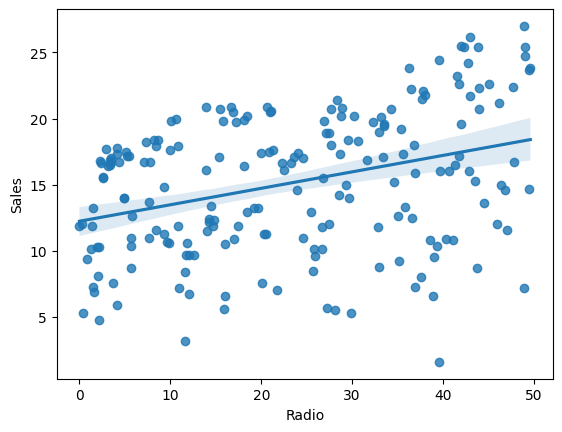

In [22]:
sns.regplot(x= df['Radio'], y = df['Sales']);

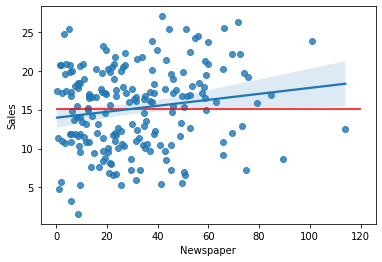

In [22]:
sns.regplot(x= df['Newspaper'], y = df['Sales']);
plt.hlines(15.13,0,120,'red')

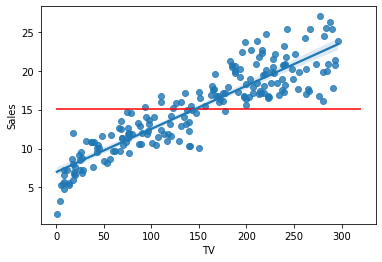

In [24]:
sns.regplot(x= df['TV'], y = df['Sales'])
plt.hlines(15.13,0,320,'red');

In [53]:
model = LinearRegression()

model.fit(df[['Newspaper']], df['Sales'])

model.score(df[['Newspaper']], df['Sales'])

0.1222419039947863

In [29]:
model.coef_

array([0.038324])

In [50]:
model.intercept_

13.959548653554414

----

# Multiple Linear Regression

Same thing, except that now we'll use more than 1 predictor variable

$$y = a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n$$

![title](https://raw.githubusercontent.com/Rairocha/images/main/mult_lin_reg.png)

In [43]:
X = df[['TV','Radio']]
y = df['Sales']

model.fit(X,y)

model.coef_

array([0.05444896, 0.10717457])

In [26]:
model.intercept_

4.63087946409777

In [27]:
TV = df['TV']
Radio = df['Radio']

In [30]:
Sales = 4.63087946409777 + 0.05444896*TV
Sales

0      17.159585
1       7.053858
2       5.567402
3      12.879897
4      14.475251
         ...    
195     6.710830
196     9.759971
197    14.268345
198    20.072605
199    17.268483
Name: TV, Length: 200, dtype: float64

In [31]:
Sales_better = 4.63087946409777 + 0.05444896*TV +  0.10717457*Radio
Sales_better

0      21.210784
1      11.265819
2      10.486714
3      17.306207
4      15.632737
         ...    
195     7.107376
196    10.285127
197    15.265069
198    24.573936
199    18.190184
Length: 200, dtype: float64

In [32]:
df['Sales']

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [40]:
sum(df['Sales'] - Sales)

498.6618670204462

In [41]:
sum(df['Sales'] - Sales_better)

2.772444599763446e-05

In [21]:
model.score(X, y)

0.9025896186081139

In [59]:
np.sqrt(mean_squared_error(y, model.predict(X)))

1.6450083823140502

> Any number of variables can be used. It doesn't mean you should.

In [31]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [32]:
model.fit(X,y)

LinearRegression()

In [33]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [34]:
model.score(X, y)

0.9025912899684558

0.9025896186081139

In [37]:
X.corr()

,TV,Newspaper
TV,1.000000,0.056648
Newspaper,0.056648,1.000000


In [68]:
pd.DataFrame({'coefs':model.coef_,'Columns':X.columns})

,coefs,Columns
0,0.054446,TV
1,0.107001,Radio
2,0.000336,Newspaper


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the model
model = LinearRegression()
X = df[['TV', 'Radio']]
y = df['Sales']
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Print the result
print(f"R-squared: {r2:.4f}")


R-squared: 0.9026


In [45]:
n = len(y)  # Number of observations
p = X.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2:.4f}")


Adjusted R-squared: 0.9016


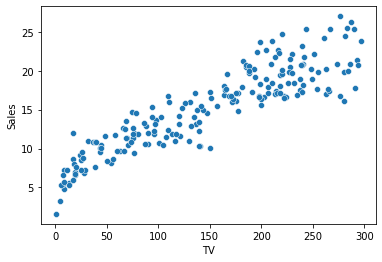

In [40]:
sns.scatterplot(x='TV',y='Sales',data=df);

(<AxesSubplot:xlabel='Radio', ylabel='Sales'>,)

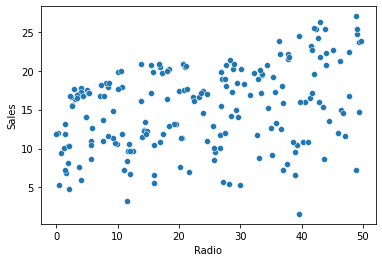

In [38]:
sns.scatterplot(x=df['Radio'],y=df['Sales']),

In [95]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Standardization (Z-score)

Standardize a variables means: transform it into a variable that has **mean = 0** and **standard deviation = 1**. In this manner, all variables are scaled to the same scale!

$$X_{std} = \frac{X - \mu}{\sigma}$$

$\mu \rightarrow$ média

$\sigma \rightarrow$ desvio padrão

<br><br>
<b>Understanding:</b>

If $X_{std}$ > 0 $\rightarrow$ it means that that specific observation is <u>above average</u>

If $X_{std}$ < 0 $\rightarrow$ it means that that specific observation is <u>below average</u>

If $X_{std}$ = 0 $\rightarrow$ it means that that specific observation is <u>the average</u>

If $X_{std}$ = 1 $\rightarrow$ it means that that specific observation is <u>1 standard deviation above average</u>

If $X_{std}$ = -2 $\rightarrow$ it means that that specific observation is <u>2 standard deviations below average</u>


In [41]:
X_std = (X - X.mean())/X.std()

In [42]:
model.fit(X_std, y)

LinearRegression()

In [43]:
model.coef_

array([4.67440089, 1.58862682, 0.00731017])

In [45]:
print(f"media {X['TV'].mean()} desvio padrao {X['TV'].std()}")

media 147.0425 desvio padrao 85.8542363149081


In [48]:
X['TV'].mean()-X['TV'].std()

-24.665972629816224

In [69]:
list(zip(X["TV"],X_std['TV']))

[(230.1, 0.9674245973763037),
 (44.5, -1.1943790359264317),
 (17.2, -1.5123598505232243),
 (151.5, 0.05191939491081339),
 (180.8, 0.39319550728026476),
 (8.7, -1.6113648660570241),
 (57.5, -1.0429596004041497),
 (120.2, -0.3126520152312966),
 (8.6, -1.612529630945657),
 (199.8, 0.6145008361205232),
 (66.1, -0.9427898199817168),
 (214.7, 0.788050804526831),
 (23.8, -1.4354853678734503),
 (97.5, -0.5770536449509739),
 (204.1, 0.6645857263317394),
 (195.4, 0.5632511810206738),
 (67.8, -0.9229888168749569),
 (281.4, 1.5649489852450014),
 (69.2, -0.9066821084340957),
 (147.3, 0.0029992695882300703),
 (218.4, 0.8311471054062499),
 (237.4, 1.0524524342465085),
 (13.2, -1.558950446068542),
 (228.3, 0.946458829380911),
 (62.3, -0.9870508857497685),
 (262.9, 1.3494674808479077),
 (142.9, -0.04825038551161933),
 (240.1, 1.0839010862395977),
 (248.8, 1.1852356315506636),
 (70.6, -0.8903753999932347),
 (292.9, 1.6988969474377893),
 (112.9, -0.39767985210150114),
 (97.2, -0.5805479396168727),
 (265.

In [70]:
list(zip(X["Radio"],X_std['Radio']))

[(37.8, 0.9790655909643101),
 (39.3, 1.0800974007088386),
 (45.9, 1.5246373635847648),
 (41.3, 1.2148064803682102),
 (10.8, -0.8395069844372047),
 (48.9, 1.726700983073822),
 (32.8, 0.6422928918158815),
 (19.6, -0.2467870339359701),
 (2.1, -1.4254914809554706),
 (2.6, -1.3918142110406277),
 (5.8, -1.1762796835856335),
 (24.0, 0.049572941314647075),
 (35.1, 0.7972083334241589),
 (7.6, -1.0550415118921992),
 (32.9, 0.64902834579885),
 (47.7, 1.6458755352781993),
 (36.6, 0.8982401431686875),
 (39.6, 1.1003037626577448),
 (20.5, -0.18616794808925302),
 (23.9, 0.04283748733167841),
 (27.7, 0.2987847386844843),
 (5.1, -1.2234278614664134),
 (15.9, -0.4959988313058074),
 (16.9, -0.4286442914761218),
 (12.6, -0.7182688127437704),
 (3.5, -1.3311951251939107),
 (29.3, 0.4065520024119816),
 (16.7, -0.4421151994420589),
 (27.1, 0.258372014786673),
 (16.0, -0.48926337732283887),
 (28.3, 0.33919746258229583),
 (17.4, -0.39496702156127894),
 (1.5, -1.4659042048532822),
 (20.0, -0.2198452180040959),
 

In [71]:
# good way to Standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X) # aprende a media e a variancia do seu X

StandardScaler()

In [72]:
scaler.transform(X)

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [73]:
X_std = scaler.transform(X) # aplica a padronização baseada no mean e std que ele aprendeu no fit
X_std

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [74]:
model = LinearRegression()

model.fit(X_std, y)

LinearRegression()

In [75]:
model.coef_

array([4.66270025, 1.58465027, 0.00729187])

In [ ]:
model.intercept_

In [76]:
# the mean error I would have in sales is:
np.sqrt(mean_squared_error(y_observed, model.predict(X_std)))

1.6449942697855562

In [77]:
model.score(X_std, y)

0.9025912899684558